<a href="https://colab.research.google.com/github/MKastek/time-series-notes/blob/main/cost_of_heating_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Input data

In [122]:
data_string = """
invoice issue date,cost of heating
11.2018,65
12.2018,91
1.2019,128
2.2019,123
3.2019,71
4.2019,22
5.2019,10
6.2019,5
7.2019,7
8.2019,8
9.2019,8
10.2019,24
2019-11-11,263
12.2019,385
1.2020,485
2.2020,455
3.2020,534
4.2020,328
5.2020,266
6.2020,281
7.2020,297
8.2020,307
9.2020,341
10.2020,365
11.2020,1225
12.2020,1377
1.2021,1373
2.2021,1153
2021-03-08,1209
4.2021,701
5.2021,569
6.2021,585
7.2021,625
8.2021,699
9.2021,730
10.2021,743
2021-11-09,1765
12.2021,1872
1/2022,1840
2/2022,1704
3/2022,2313
4/2022,1952
5/2022,1755
6/2022,979
7/2022,1271
8/2022,1384
9/2022,1360
10/2022,1363
11/2022,2719
12/2022,2961
"""

### Read Dataframe  
Invoise issue date is in different formats eg. `11.2018`, `2019-11-11`, `12/2022`. Time series ia a sequence of data points organized in time order. The sequence captures data at equally spaced points in time. Data collected irregularly is not considered a time series.  

Invoice issue date is changed to be regularly spaced - first day of month.

In [123]:
df = pd.read_csv(StringIO(data_string))

In [124]:

df

,invoice issue date,cost of heating
0,11.2018,65
1,12.2018,91
2,1.2019,128
3,2.2019,123
4,3.2019,71
5,4.2019,22
6,5.2019,10
7,6.2019,5
8,7.2019,7
9,8.2019,8


In [125]:
def clean_time_data(df: pd.DataFrame, time_column: str)-> pd.DataFrame:
  df[time_column] = df[time_column].apply(lambda x: x.replace('.','/'))
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce');
  df[time_column] = df[time_column].dt.to_period('M').dt.to_timestamp()
  return df

In [126]:
df = clean_time_data(df, 'invoice issue date')

<ipython-input-125-a8ab27a19dee>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[time_column] = pd.to_datetime(df[time_column], errors='coerce');


In [127]:
df

,invoice issue date,cost of heating
0,2018-11-01,65
1,2018-12-01,91
2,2019-01-01,128
3,2019-02-01,123
4,2019-03-01,71
5,2019-04-01,22
6,2019-05-01,10
7,2019-06-01,5
8,2019-07-01,7
9,2019-08-01,8


### Time series - plot

<Axes: xlabel='invoice issue date'>

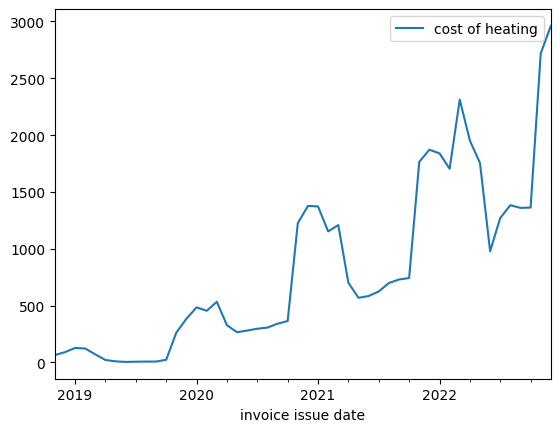

In [128]:
df.plot(x='invoice issue date', y='cost of heating')

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x=df['cost of heating'], model='multiplicative', period=12)

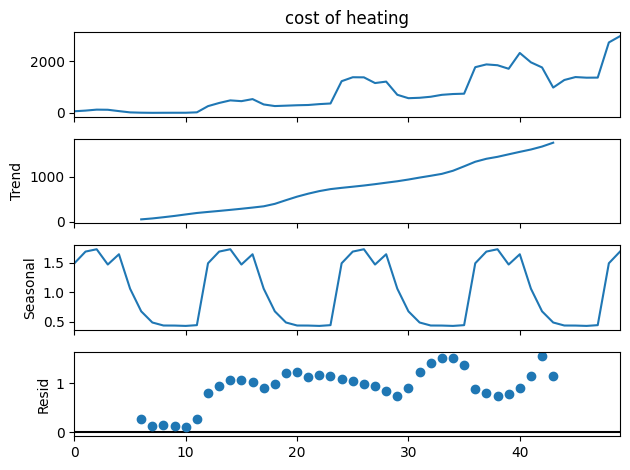

In [130]:
result.plot()
plt.show()

In [131]:
reconstructed = result.trend * result.seasonal * result.resid

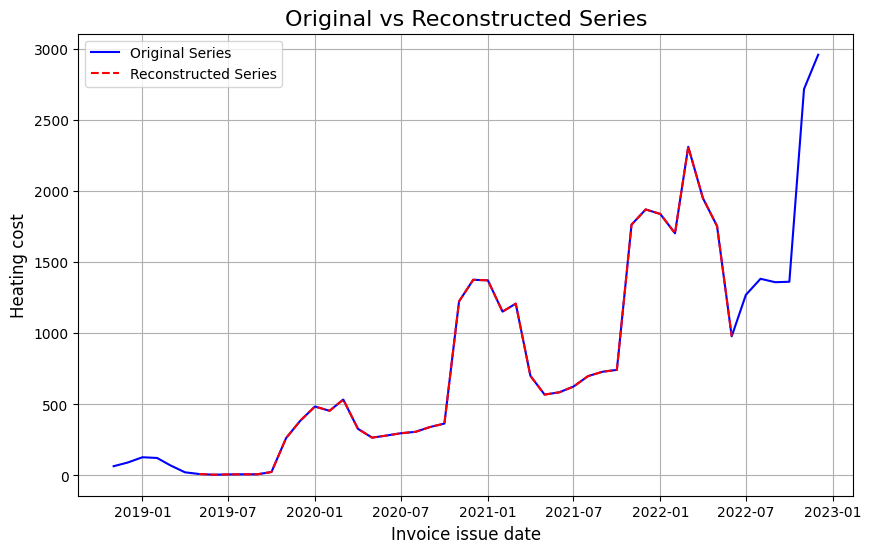

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(df['invoice issue date'],df['cost of heating'], label='Original Series', color='blue')
plt.plot(df['invoice issue date'],reconstructed, label='Reconstructed Series', color='red', linestyle='--')
plt.xlabel("Invoice issue date",fontsize=12)
plt.ylabel("Heating cost",fontsize=12)
plt.legend()
plt.grid()
plt.title("Original vs Reconstructed Series",fontsize=16)
plt.show()

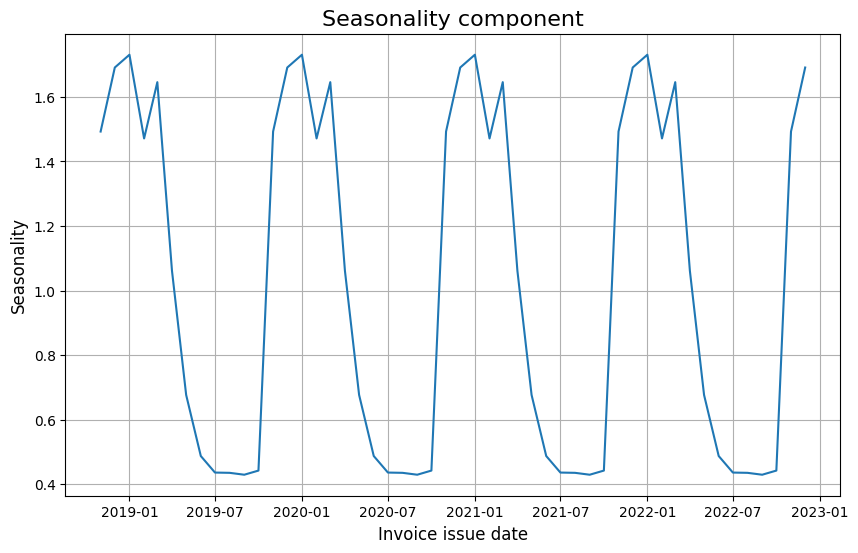

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(df['invoice issue date'], result.seasonal, label='Seasonality')
plt.xlabel("Invoice issue date",fontsize=12)
plt.ylabel("Seasonality",fontsize=12)
plt.title("Seasonality component",fontsize=16)
plt.grid()

In [134]:
pd.DataFrame({'date': df['invoice issue date'], 'seasonality': result.seasonal})

,date,seasonality
0,2018-11-01,1.492564
1,2018-12-01,1.690921
2,2019-01-01,1.730542
3,2019-02-01,1.471179
4,2019-03-01,1.645520
5,2019-04-01,1.061322
6,2019-05-01,0.676741
7,2019-06-01,0.487497
8,2019-07-01,0.436274
9,2019-08-01,0.435435


In [135]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

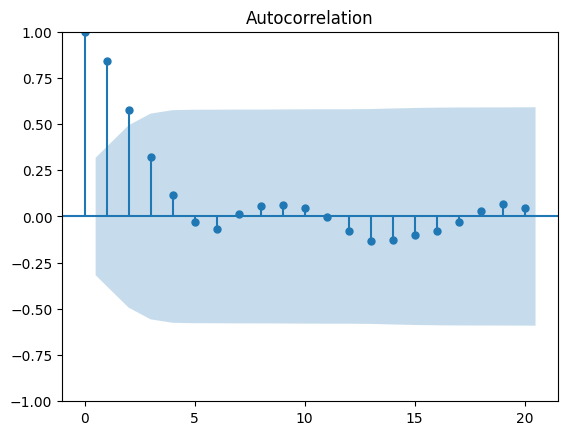

In [136]:
plot_acf(result.resid.dropna(), lags=20)
plt.show()

In [137]:
adf_result = adfuller(result.resid.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -2.8219629494216205
p-value: 0.05520435651872358


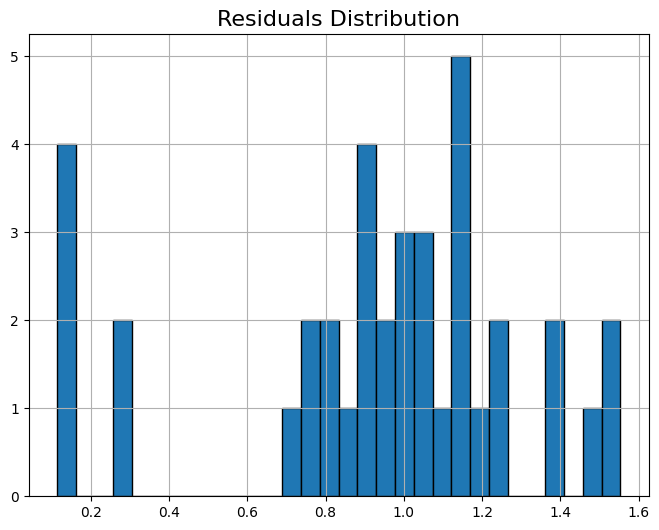

In [138]:
plt.figure(figsize=(8, 6))
plt.hist(result.resid.dropna(), bins=30, edgecolor='black')
plt.grid()
plt.title('Residuals Distribution',fontsize=16)
plt.show()

In [139]:
np.mean(result.resid.dropna())

0.9256935351159236

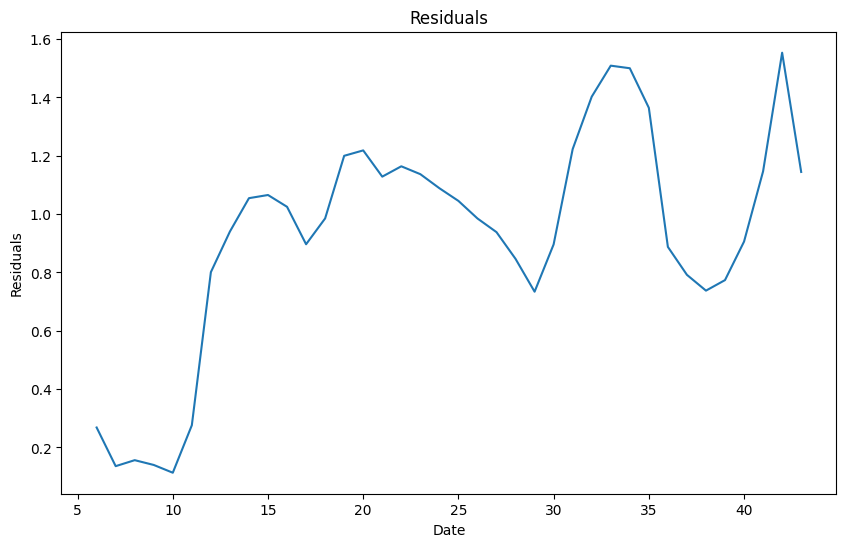

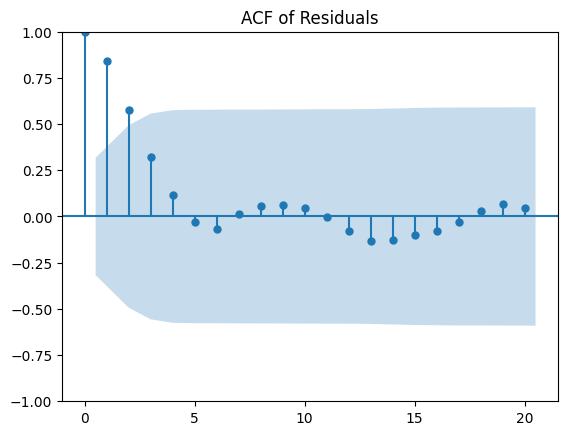

ADF Statistic: -2.8219629494216205
p-value: 0.05520435651872358


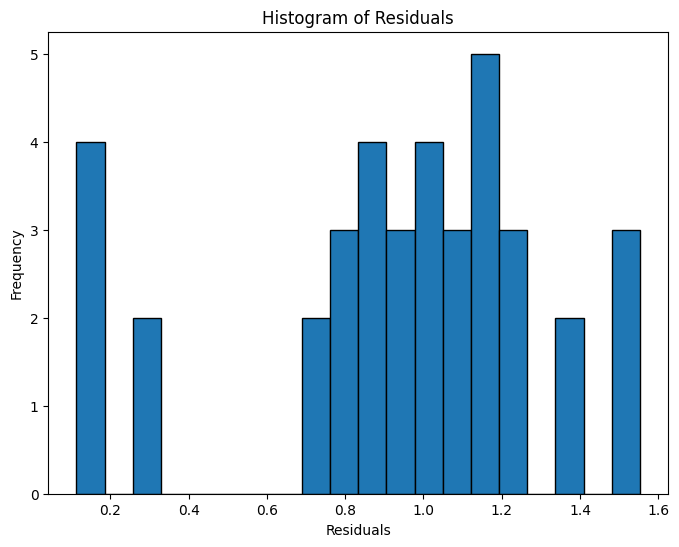

In [140]:
residuals = result.resid.dropna()
# 1. Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# 2. Plot ACF of residuals (AutoCorrelation Function)
plot_acf(residuals.dropna(), lags=20)
plt.title('ACF of Residuals')
plt.show()

# 3. Perform Augmented Dickey-Fuller test to check for stationarity
adf_result = adfuller(residuals.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# 4. Check for normality of residuals (optional)
plt.figure(figsize=(8, 6))
plt.hist(residuals.dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Anomaly detection with Z-score

In [141]:
import scipy.stats as stats

In [160]:
df['z_score'] = np.round(np.abs(stats.zscore(df['cost of heating'])),2)

In [161]:
df

,invoice issue date,cost of heating,z_score
0,2018-11-01,65,1.00
1,2018-12-01,91,0.97
2,2019-01-01,128,0.92
3,2019-02-01,123,0.92
4,2019-03-01,71,0.99
5,2019-04-01,22,1.06
6,2019-05-01,10,1.07
7,2019-06-01,5,1.08
8,2019-07-01,7,1.08
9,2019-08-01,8,1.08


In [163]:
predicate_z_score = df['z_score'] > 1.9
df[predicate_z_score]

,invoice issue date,cost of heating,z_score
40,2022-03-01,2313,1.97
48,2022-11-01,2719,2.51
49,2022-12-01,2961,2.83


### Anomaly plot z score

In [193]:
def plot_anomalies(predicate, title):
  plt.figure(figsize=(10, 6))
  plt.plot(df['invoice issue date'], df['cost of heating'], label='Cost of Heating', color='blue', marker='o')
  plt.scatter(df['invoice issue date'][predicate], df['cost of heating'][predicate],
              color='red', label='Anomalies', s=100, edgecolor='black')
  plt.title( title,fontsize=16)
  plt.xlabel('Invoice Issue Date',fontsize=12)
  plt.ylabel('Heating cost',fontsize=12)
  plt.legend()
  plt.grid()

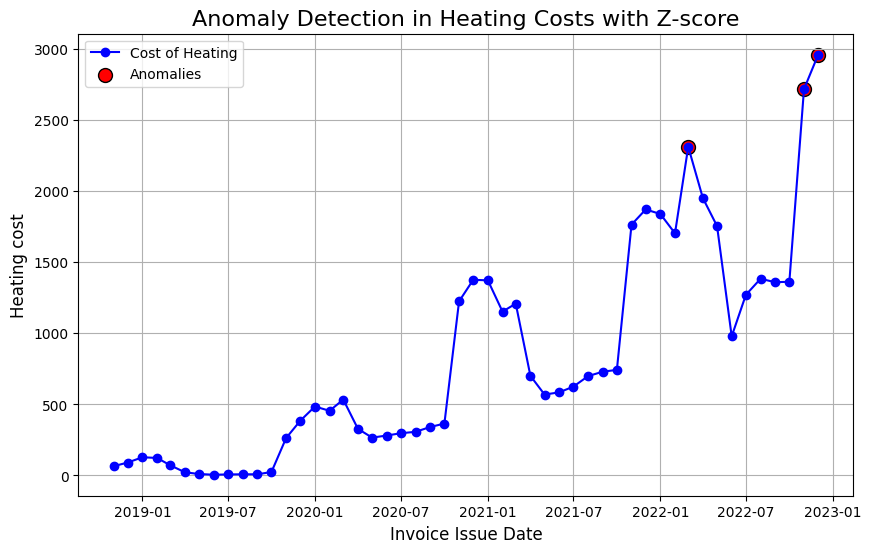

In [194]:
plot_anomalies(predicate_z_score,'Anomaly Detection in Heating Costs with Z-score')

### Moving average

In [166]:
df['centered_moving_avg'] = df['cost of heating'].rolling(window=3, center=True).mean()

In [168]:
df['avg_deviation'] = abs(df['cost of heating'] - df['centered_moving_avg'])

In [189]:
df.loc[1:49,"z_score_deviation"] = np.round(np.abs(stats.zscore(df['avg_deviation'][1:49])),2);

In [190]:
df

,invoice issue date,cost of heating,z_score,centered_moving_avg,avg_deviation,z_score_deviation
0,2018-11-01,65,1.00,NaN,NaN,NaN
1,2018-12-01,91,0.97,94.666667,3.666667,0.72
2,2019-01-01,128,0.92,114.000000,14.000000,0.64
3,2019-02-01,123,0.92,107.333333,15.666667,0.63
4,2019-03-01,71,0.99,72.000000,1.000000,0.75
5,2019-04-01,22,1.06,34.333333,12.333333,0.65
6,2019-05-01,10,1.07,12.333333,2.333333,0.73
7,2019-06-01,5,1.08,7.333333,2.333333,0.73
8,2019-07-01,7,1.08,6.666667,0.333333,0.75
9,2019-08-01,8,1.08,7.666667,0.333333,0.75


In [206]:
predicate_z_score_deviation = df['z_score_deviation'] > 1.9
df[["invoice issue date", "cost of heating", "z_score_deviation"]][predicate_z_score_deviation]

,invoice issue date,cost of heating,z_score_deviation
35,2021-10-01,743,2.01
43,2022-06-01,979,2.17
47,2022-10-01,1363,2.95
48,2022-11-01,2719,2.30


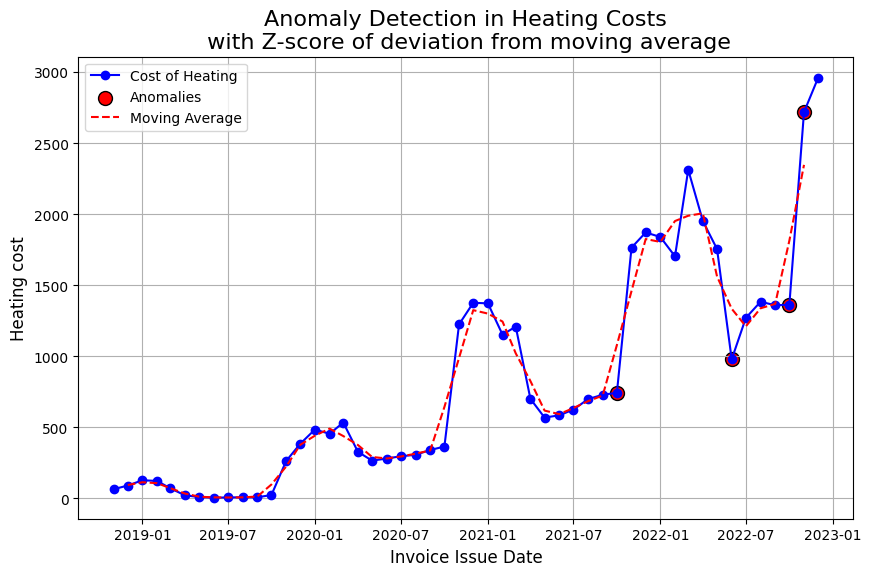

In [210]:
plot_anomalies(predicate_z_score_deviation,'Anomaly Detection in Heating Costs\n with Z-score of deviation from moving average')
plt.plot(df['invoice issue date'], df['centered_moving_avg'], label='Moving Average', color='red', linestyle='--');
plt.legend();

### Anomaly detection with Isolation Forest

In [213]:
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

In [229]:
model_contamination_0_1 = IsolationForest(random_state=42,contamination=0.1)
predictate_isolation_forest_contamination_0_1 =  model_contamination_0_1.fit_predict(df[['cost of heating']]) == -1
df[["invoice issue date", "cost of heating"]][predictate_isolation_forest_contamination_0_1]

,invoice issue date,cost of heating
40,2022-03-01,2313
41,2022-04-01,1952
43,2022-06-01,979
48,2022-11-01,2719
49,2022-12-01,2961


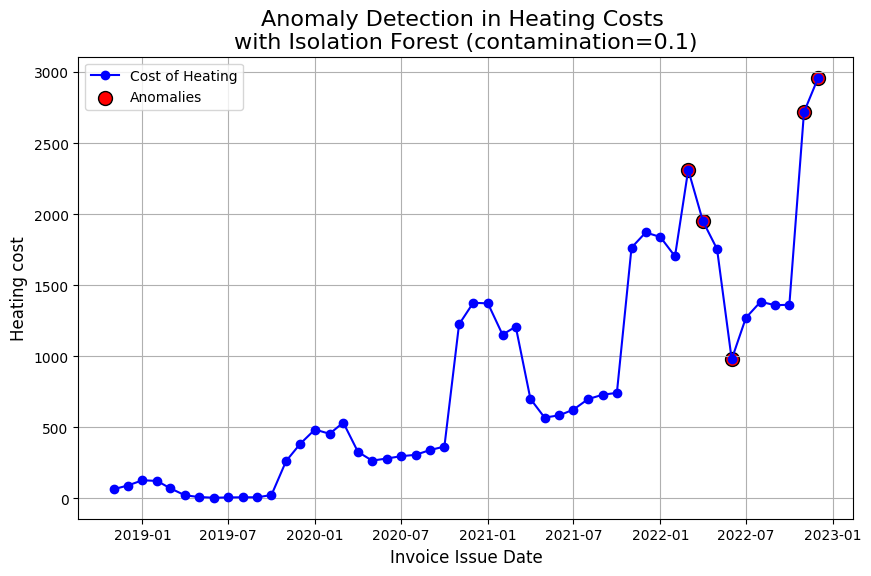

In [230]:
plot_anomalies(predictate_isolation_forest, 'Anomaly Detection in Heating Costs \nwith Isolation Forest (contamination=0.1)')

In [233]:
model_contamination_0_15 = IsolationForest(random_state=42,contamination=0.15)
predictate_isolation_forest_contamination_0_15 =  model_contamination_0_15.fit_predict(df[['cost of heating']]) == -1
df[["invoice issue date", "cost of heating"]][predictate_isolation_forest_contamination_0_15]

,invoice issue date,cost of heating
37,2021-12-01,1872
38,2022-01-01,1840
39,2022-02-01,1704
40,2022-03-01,2313
41,2022-04-01,1952
43,2022-06-01,979
48,2022-11-01,2719
49,2022-12-01,2961


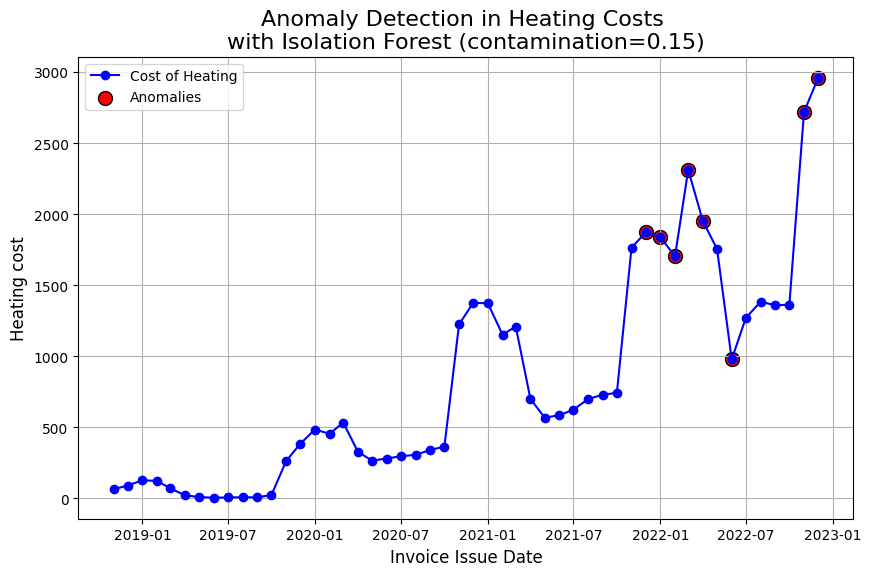

In [234]:
plot_anomalies(predictate_isolation_forest_contamination_0_15 , 'Anomaly Detection in Heating Costs \nwith Isolation Forest (contamination=0.15)')